<a href="https://colab.research.google.com/github/mnrazamohamed/Diabetes-Prediction-Using-Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

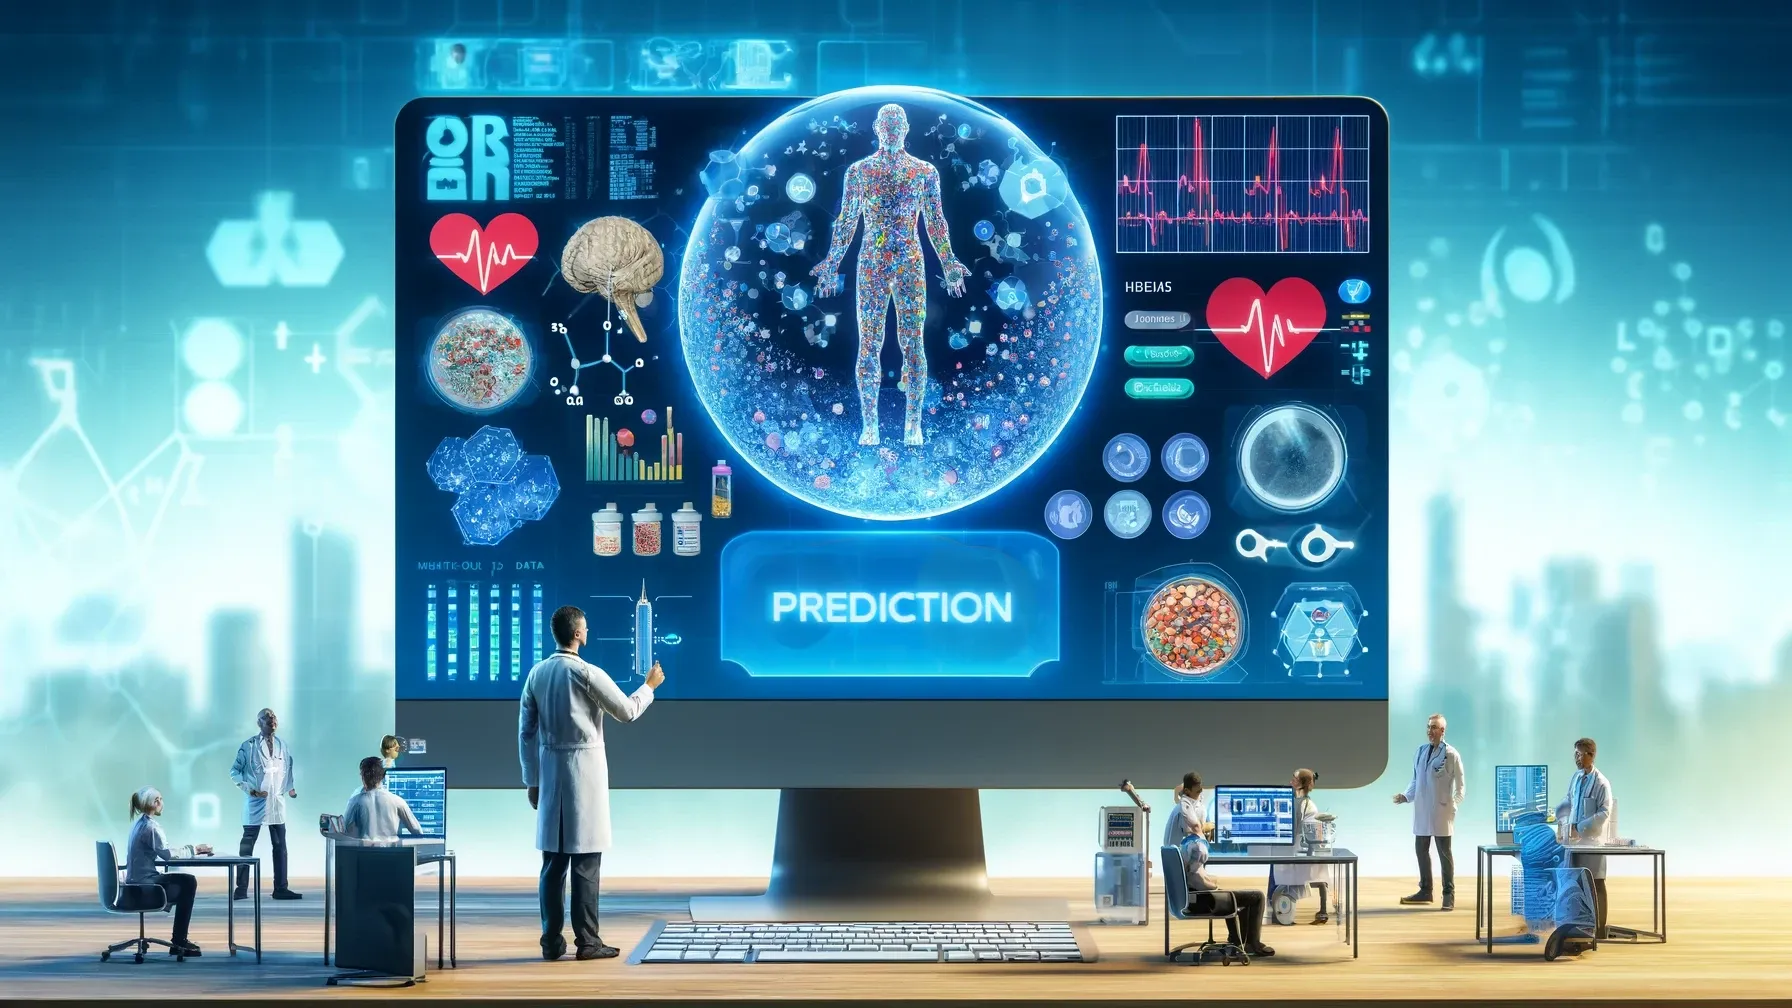

# **Diabetes Prediction Using Deep Learning**


Name: Mohamed Nawas Raza Mohamed

Student Number: 24148501

Module: Applied AI - Deep Learning & Optimisation

Project Overview: This project aims to develop a deep learning model to predict the likelihood of diabetes based on patient medical records. The dataset consists of medical records from Pima Indians, indicating whether they developed diabetes within five years. The objective is to build and optimize a neural network using deep learning concepts to improve prediction accuracy. This project has real-world applications in medical diagnosis, aiding in early detection and proactive healthcare measures.

### Google Drive Integration

Mounts Google Drive to the Colab environment, allowing access to stored files such as datasets and models. This ensures that data can be loaded directly from Google Drive into the notebook.

In [ ]:
# Mount Google Drive to access stored files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset Path Setup
Defines the file paths for training and testing datasets stored on Google Drive. These paths are essential for loading the dataset into the notebook for further processing.

In [ ]:
# Define file paths for training and test datasets stored in Google Drive

train_path = '/content/drive/MyDrive/BCU - MSc in AI/Deep Learning/train.csv'
test_path  = '/content/drive/MyDrive/BCU - MSc in AI/Deep Learning/test.csv'

train_img_path  = '/content/drive/MyDrive/BCU - MSc in AI/Deep Learning/test.csv'
test_img_path  = '/content/drive/MyDrive/BCU - MSc in AI/Deep Learning/test.csv'

### Importing Pandas
Imports the pandas library, a fundamental tool for data manipulation and analysis. This step is crucial for reading the dataset into DataFrames for processing.

In [ ]:
# Import the pandas library for data manipulation
import pandas as pd

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


### Checking Dataset Shape
Displays the shape of the training and test datasets, showing the number of rows (samples) and columns (features). This helps verify that the dataset has been loaded correctly.

In [ ]:
print(train_df.shape)
print(test_df.shape)

(668, 10)
(100, 9)


### Class Distribution Analysis  

Displays the distribution of the target variable (class) in the training dataset. This helps in understanding the balance between different classes, which is crucial for model training.  


In [ ]:
train_df['class'].value_counts()

,count
class,
0,437
1,231


### Checking Dataset Columns  

Prints the column names of both the training and test datasets. This ensures that the datasets have the expected features before preprocessing.  


In [ ]:
print(train_df.columns)
print(test_df.columns)

Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'class'], dtype='object')
Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'], dtype='object')


### Dropping Unnecessary Columns  

Removes the id column from both the training and test datasets, as it does not contribute to the predictive modeling process.  


In [ ]:
# Drop the 'id' column from the training dataset
train_df = train_df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)

### Checking for Missing Values  

Identifies any missing values in the training dataset. This helps in determining whether imputation or data cleaning is required before training the model.  


In [ ]:
# Check for missing values in the training dataset
print(train_df.isnull().sum())

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64


### Summary Statistics  

Displays summary statistics of the training dataset, including count, mean, standard deviation, minimum, and maximum values for each feature. This helps in understanding the distribution and scale of the data.  


In [ ]:
# Display summary statistics of the training dataset
print(train_df.describe())



               A1          A2          A3          A4          A5          A6  \
count  668.000000  668.000000  668.000000  668.000000  668.000000  668.000000   
mean     3.812874  120.405689   68.748503   20.567365   79.654192   31.860180   
std      3.365672   32.291473   19.526392   16.020600  115.827750    7.827111   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   72.000000   23.000000   36.500000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  126.000000   36.500000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

               A7          A8       class  
count  668.000000  668.000000  668.000000  
mean     0.477329   33.091317    0.345808  
std      0.341398   11.711386    0.475988  
min      0.078000   21.000000    0.000000  
25%      0.238750   24.000000    0.000000  
50%   

### Data Visualization - Feature Distribution  

Imports the Matplotlib library for visualization and plots histograms for all features in the dataset. This helps in understanding the distribution of each variable, identifying potential skewness, and detecting outliers.  


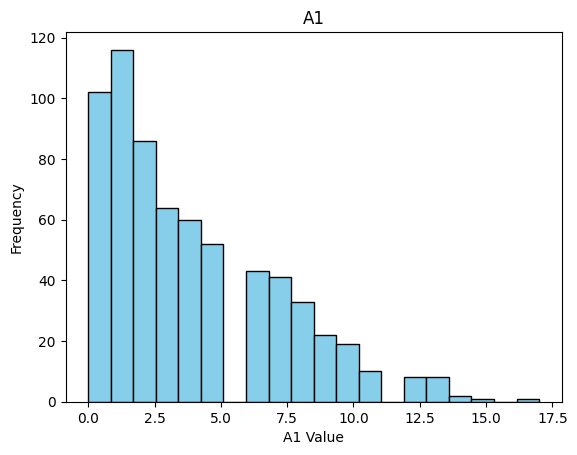

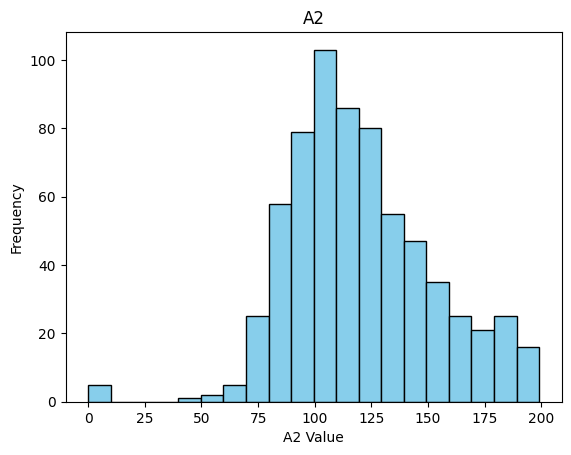

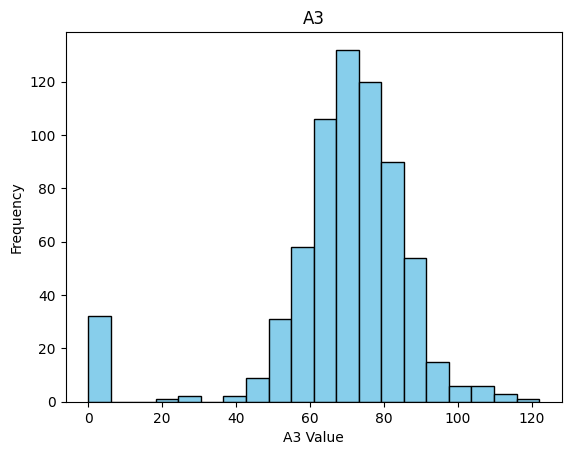

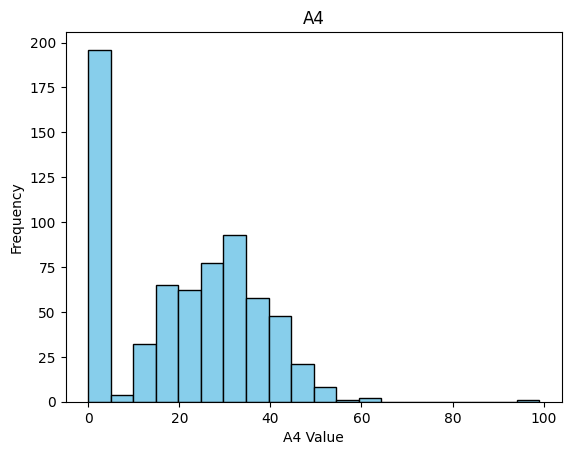

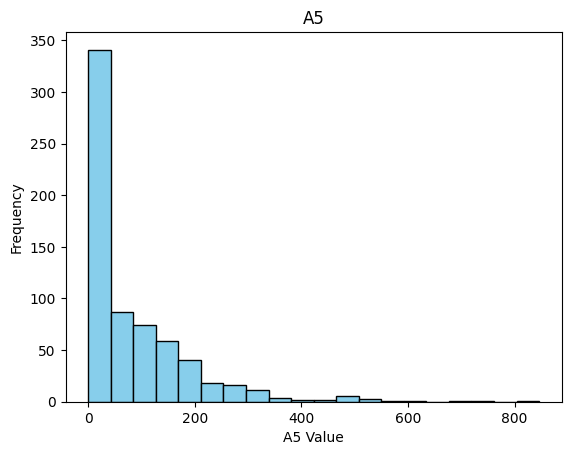

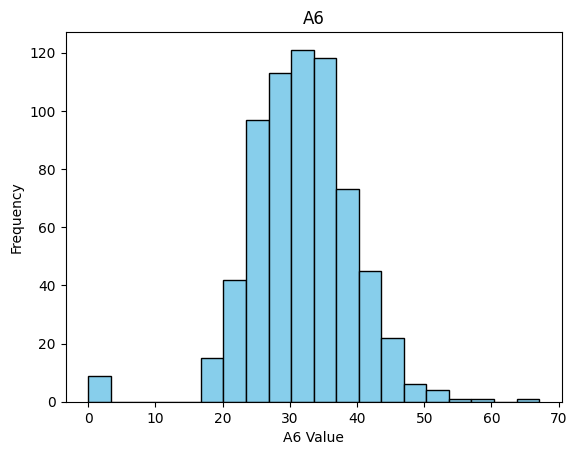

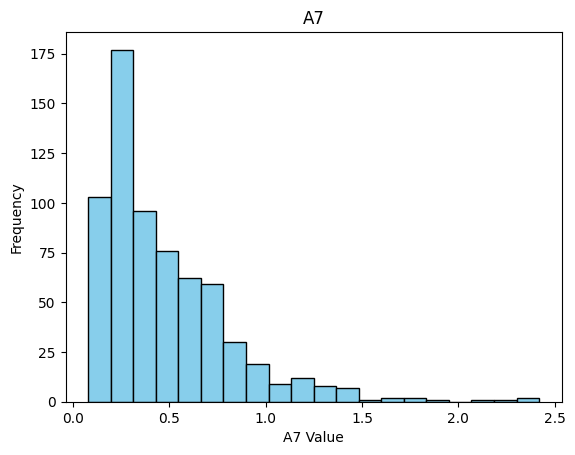

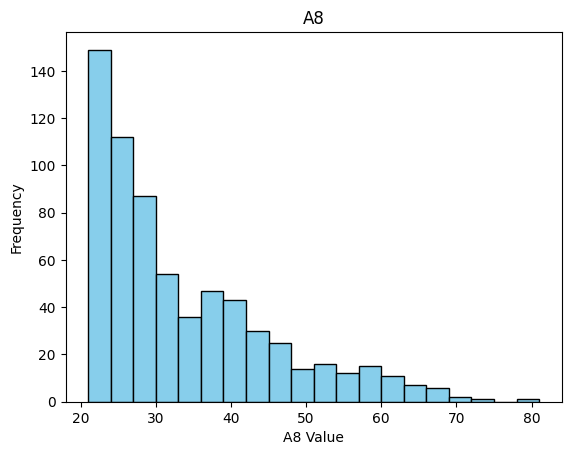

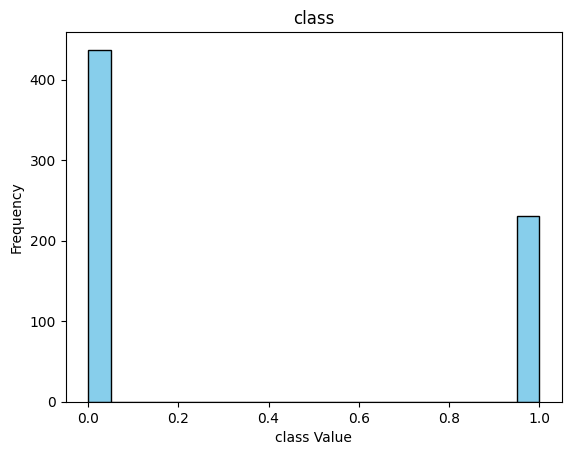

In [ ]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Plot a histogram of A2 (Plasma glucose concentration)
for col in train_df.columns:
  plt.hist(train_df[col], bins=20, color='skyblue', edgecolor='black')
  plt.title(col)
  plt.xlabel(f"{col} Value")
  plt.ylabel('Frequency')
  plt.show()

### Handling Missing or Zero Values  

Replaces zero values in specific numerical features with their respective median values. This helps in dealing with missing or incorrect data that could otherwise affect model performance.  


In [ ]:
# Replace zeros with the median value for each feature
for column in ['A2', 'A3', 'A4', 'A5', 'A6']:
    train_df[column] = train_df[column].replace(0, train_df[column].median())
    test_df[column] = test_df[column].replace(0, test_df[column].median())

### Feature Correlation Analysis  

Computes the correlation matrix for all features in the training dataset and visualizes it using a heatmap. This helps identify relationships between variables and determine which features are most relevant to the target variable (class).  


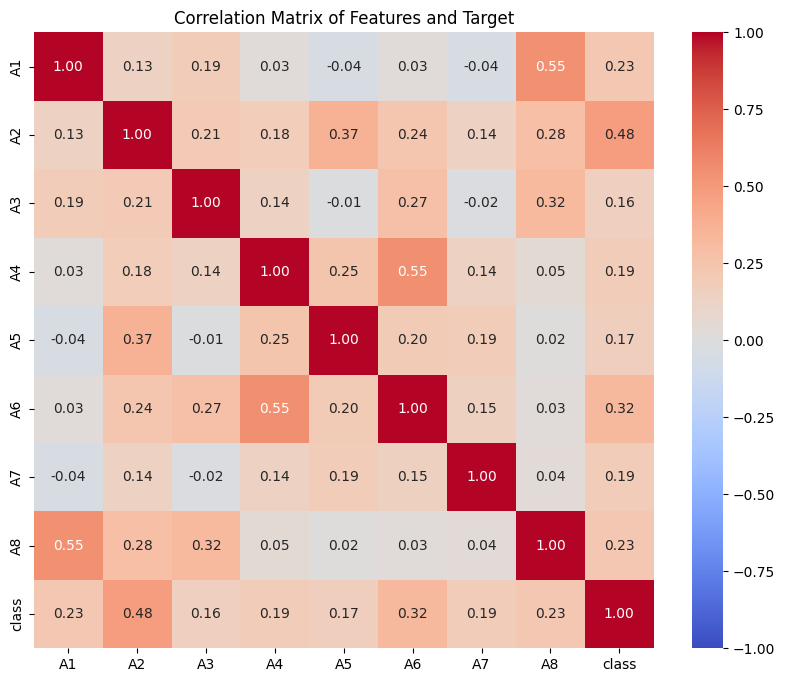

Correlation of features with the target (class):
class    1.000000
A2       0.482862
A6       0.323884
A8       0.231002
A1       0.227623
A4       0.191880
A7       0.189743
A5       0.171035
A3       0.158327
Name: class, dtype: float64


In [ ]:
# Import seaborn for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features and Target')
plt.show()

# Print the correlations with the target ('class') specifically
print("Correlation of features with the target (class):")
print(corr_matrix['class'].sort_values(ascending=False))

### Statistical Hypothesis Testing - T-Test  

Performs Welch’s t-test to compare the means of different features between two groups:  
- **Class 0 (No Diabetes)**  
- **Class 1 (Diabetes)**  

This test helps determine whether there is a significant difference in feature values between the two groups, which can be useful for feature selection in model training.  


In [ ]:
# Import scipy for hypothesis testing
from scipy.stats import ttest_ind

# Separate the data into two groups based on the target
group0 = train_df[train_df['class'] == 0]  # No diabetes
group1 = train_df[train_df['class'] == 1]  # Diabetes

# Compute means for each group and perform t-test
features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
print("Mean values and T-test results for each feature:")
for feature in features:
    mean_group0 = group0[feature].mean()
    mean_group1 = group1[feature].mean()
    stat, p_value = ttest_ind(group0[feature], group1[feature], equal_var=False)  # Welch's t-test
    print(f"{feature}:")
    print(f"  Mean (Class 0) = {mean_group0:.2f}, Mean (Class 1) = {mean_group1:.2f}")
    print(f"  p-value = {p_value:.4f}\n")

Mean values and T-test results for each feature:
A1:
  Mean (Class 0) = 3.26, Mean (Class 1) = 4.87
  p-value = 0.0000

A2:
  Mean (Class 0) = 110.56, Mean (Class 1) = 141.55
  p-value = 0.0000

A3:
  Mean (Class 0) = 70.82, Mean (Class 1) = 74.80
  p-value = 0.0000

A4:
  Mean (Class 0) = 26.00, Mean (Class 1) = 29.80
  p-value = 0.0000

A5:
  Mean (Class 0) = 84.25, Mean (Class 1) = 121.84
  p-value = 0.0001

A6:
  Mean (Class 0) = 30.67, Mean (Class 1) = 35.36
  p-value = 0.0000

A7:
  Mean (Class 0) = 0.43, Mean (Class 1) = 0.57
  p-value = 0.0000

A8:
  Mean (Class 0) = 31.13, Mean (Class 1) = 36.81
  p-value = 0.0000



### Data Preprocessing - Splitting and Scaling  

1. **Train-Validation Split:**  
   - Splits the dataset into training (80%) and validation (20%) sets.  
   - Uses stratification to maintain the class distribution.  

2. **Feature Scaling:**  
   - Applies StandardScaler to normalize feature values, ensuring consistent data distribution for better model performance.  
   - The scaler is fitted only on the training data and then applied to the validation set to prevent data leakage.  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = train_df.drop('class', axis=1)  # Features
y = train_df['class']               # Target

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,        # 20% for validation
    random_state=42,
    stratify=y            # keeps class distribution balanced
)

scaler = StandardScaler()
# Fit on training only
X_train_scaled = scaler.fit_transform(X_train)
# Transform validation using the same scaler
X_val_scaled = scaler.transform(X_val)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df   = pd.DataFrame(X_val_scaled,   columns=X_val.columns)


### Handling Class Imbalance with SMOTE  

Applies **Synthetic Minority Over-sampling Technique (SMOTE)** to balance the dataset by generating synthetic samples for the minority class. This helps prevent bias in model training and improves predictive performance.  


In [ ]:
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_scaled_df, y_train)


## **Model**


### Importing Required Libraries  

Imports essential libraries for:  
- Building deep learning models using TensorFlow and Keras.  
- Evaluating model performance with classification metrics such as precision, recall, F1-score, and accuracy.  
- Optimizing neural networks using the Adam optimizer.  


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import numpy

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam


### Initializing Model Storage  

Creates empty dictionaries to store trained models and their evaluation scores, facilitating model comparison and selection.  


In [ ]:
# Initialize dictionaries to store models and scores
models = {}
model_scores = {}

## Hyper Tune

### Installing Optuna for Hyperparameter Optimization  

Installs **Optuna**, an automatic hyperparameter optimization framework. Optuna helps in tuning machine learning model parameters efficiently to achieve better performance.  


In [ ]:
# Cell 1: Install Optuna
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.1 MB/s eta 0:00:00


### Importing Required Libraries for Model Training  

Imports necessary libraries for:  
- **Deep learning (TensorFlow/Keras):** Used for building and training neural networks.  
- **Hyperparameter tuning (Optuna):** Optimizes model parameters efficiently.  
- **Model evaluation (sklearn.metrics):** Computes accuracy and F1-score.  
- **Callbacks (EarlyStopping):** Prevents overfitting by stopping training early.  

### Setting Random Seeds for Reproducibility  

Fixes random seeds for **NumPy**, **TensorFlow**, and **Python's random module** to ensure consistent results across different runs.  


In [ ]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score

import random
import numpy as np
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


### Hyperparameter Optimization with Optuna  

Defines an **Optuna objective function** to optimize hyperparameters for a neural network model.  

- **Hyperparameters tuned:**  
  - Learning rate  
  - LeakyReLU activation alpha  
  - L2 regularization strength  
  - Number of units in hidden layers  
  - Dropout rates  

- **Model Architecture:**  
  - Two hidden layers with LeakyReLU, BatchNormalization, and Dropout  
  - Output layer with **sigmoid activation** for binary classification  

- **Training Strategy:**  
  - Uses **EarlyStopping** to prevent overfitting  
  - Tracks best validation precision and updates the globally stored best model  


In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Global storage for best model & best score
best_model = None
best_score = 0.0
history = None

def objective(trial):
    global best_model
    global best_score
    global history

    # -- Hyperparameters to tune --
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    alpha         = trial.suggest_float('leakyrelu_alpha', 1e-3, 1e-1, log=True)
    l2_reg        = trial.suggest_float('l2_reg', 1e-5, 1e-2, log=True)
    units_layer1  = trial.suggest_int('units_layer1', 32, 256, step=32)
    units_layer2  = trial.suggest_int('units_layer2', 16, 128, step=16)
    dropout1      = trial.suggest_float('dropout1', 0.0, 0.7)
    dropout2      = trial.suggest_float('dropout2', 0.0, 0.7)

    # -- Build model: Use tf.keras.Input & negative_slope --
    model = Sequential()
    model.add(tf.keras.Input(shape=(8,)))  # For example, 8 features

    model.add(Dense(units_layer1, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(LeakyReLU(negative_slope=alpha))
    model.add(BatchNormalization())
    model.add(Dropout(dropout1))

    model.add(Dense(units_layer2, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(LeakyReLU(negative_slope=alpha))
    model.add(BatchNormalization())
    model.add(Dropout(dropout2))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
    )

    # -- Callbacks & Training --
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=0
    )

    history_temp = model.fit(
        X_train_oversampled,
        y_train_oversampled,
        validation_data=(X_val_scaled, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # -- Evaluate best val accuracy in the training log --
    best_val_pre = max(history_temp.history['val_precision'])

    # -- If better, store globally --
    if best_val_pre > best_score:
        best_score = best_val_pre
        # clone model architecture
        best_model = tf.keras.models.clone_model(model)
        # copy weights
        best_model.set_weights(model.get_weights())

        history = history_temp

    # Return the objective metric to be maximized
    return best_val_pre


### Running Optuna Hyperparameter Optimization  

Creates and runs an **Optuna study** to optimize the deep learning model:  

- **Objective:** Maximize validation precision.  
- **Trials:** Runs 50 trials to explore different hyperparameter combinations.  
- **Best Model Selection:** The best-performing model (architecture + weights) is stored globally.  

After completion, the best validation accuracy score is printed.  


In [ ]:
from os import name

study = optuna.create_study(direction='maximize', study_name='DNN Optimizer')
study.optimize(objective, n_trials=50)

# After study finishes, "best_model" is the actual model (architecture + weights)
print("Best val accuracy from study:", best_score)


[I 2025-03-08 22:59:08,408] A new study created in memory with name: DNN Optimizer
[I 2025-03-08 22:59:21,145] Trial 0 finished with value: 0.5064935088157654 and parameters: {'learning_rate': 0.001118117431309099, 'leakyrelu_alpha': 0.054101892470830096, 'l2_reg': 5.278593126739348e-05, 'units_layer1': 160, 'units_layer2': 80, 'dropout1': 0.16941265668970307, 'dropout2': 0.3504475493220575}. Best is trial 0 with value: 0.5064935088157654.
[I 2025-03-08 22:59:42,127] Trial 1 finished with value: 0.6065573692321777 and parameters: {'learning_rate': 6.209516103631289e-05, 'leakyrelu_alpha': 0.08197801066658501, 'l2_reg': 0.0022404588485763293, 'units_layer1': 192, 'units_layer2': 96, 'dropout1': 0.11400574591633725, 'dropout2': 0.12591407213269237}. Best is trial 1 with value: 0.6065573692321777.
[I 2025-03-08 22:59:48,907] Trial 2 finished with value: 0.5806451439857483 and parameters: {'learning_rate': 0.0009937750858286492, 'leakyrelu_alpha': 0.004752354308457689, 'l2_reg': 0.00028609

Best val accuracy from study: 1.0


### Displaying Optuna Study Results  

Prints a summary of the hyperparameter optimization process:  
- **Number of completed trials** – Total iterations performed.  
- **Best trial parameters** – The optimal hyperparameter values found.  
- **Best validation precision** – The highest precision score achieved during optimization.  


In [ ]:
print("Number of finished trials:", len(study.trials))
print("Best trial:", study.best_trial.params)
print("Best value (Val Precision):", study.best_value)


Number of finished trials: 50
Best trial: {'learning_rate': 0.004808111637108136, 'leakyrelu_alpha': 0.003101368366122436, 'l2_reg': 0.004420802528673663, 'units_layer1': 128, 'units_layer2': 96, 'dropout1': 0.09860747104656145, 'dropout2': 0.07671946394223189}
Best value (Val Precision): 1.0


### Retrieving Best Hyperparameters  

Extracts and prints the optimal hyperparameter values found by Optuna during the tuning process. These values will be used for model refinement and further experiments.  


In [ ]:
best_params = study.best_trial.params
print(best_params)


{'learning_rate': 0.004808111637108136, 'leakyrelu_alpha': 0.003101368366122436, 'l2_reg': 0.004420802528673663, 'units_layer1': 128, 'units_layer2': 96, 'dropout1': 0.09860747104656145, 'dropout2': 0.07671946394223189}


### Displaying Best Model Architecture  

Prints the architecture of the **best-performing model**, including:  
- The number of layers  
- Layer types and activation functions  
- Total trainable and non-trainable parameters  

This helps in understanding the model structure and verifying its complexity.  


In [ ]:
best_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_38 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_39 (LeakyReLU)           │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,529 (56.75 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 448 (1.75 KB)

### Evaluating Best Model Performance  

This cell evaluates the performance of the best-trained deep learning model using various classification metrics. Predictions are made on both the training and validation datasets by applying a 0.5 threshold to convert the model’s output probabilities into binary values (0 or 1). The evaluation includes accuracy, which measures the overall correctness of predictions, precision, which identifies the proportion of correctly predicted positive cases, recall, which determines the model’s ability to detect actual positive cases, and the F1 score, which balances precision and recall. Additionally, a confusion matrix is computed to provide insights into false positives and false negatives. The computed metrics are then stored in a dictionary (model_scores) for future comparisons, while the best-performing model is saved under the key 'DNN' in the models dictionary. Finally, the results, including accuracy, precision, recall, F1 score, and the confusion matrix, are printed for review.  


In [ ]:
# Imports (if not already imported)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Predict on training and validation sets
y_train_pred = (best_model.predict(X_train_scaled) > 0.5).astype(int)
y_val_pred   = (best_model.predict(X_val_scaled)   > 0.5).astype(int)

# Compute metrics
train_acc = accuracy_score(y_train, y_train_pred)
val_acc   = accuracy_score(y_val, y_val_pred)
acc_diff  = train_acc - val_acc

prec      = precision_score(y_val, y_val_pred)
rec       = recall_score(y_val, y_val_pred)
f1        = f1_score(y_val, y_val_pred)

conf_m    = confusion_matrix(y_val, y_val_pred)

# Store the scores in the dictionary (rename 'model_2' key as you prefer)
model_scores['DNN'] = {
    'training_accuracy':   train_acc,
    'validation_accuracy': val_acc,
    'train_val_acc_diff': acc_diff,
    'precision':           prec,
    'recall':              rec,
    'f1_score':            f1,
    'confusion_matrix':    conf_m
}

models['DNN'] = best_model

# Print out results if desired
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:", conf_m)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training Accuracy: 0.7247
Validation Accuracy: 0.7090
Precision: 0.7692
Recall: 0.2174
F1 Score: 0.3390
Confusion Matrix: [[85  3]
 [36 10]]


### Visualizing Model Training Performance  

1. **Loss Curve:**  
   - Plots **training loss** and **validation loss** over epochs.  
   - Helps identify overfitting if validation loss increases while training loss decreases.  

2. **Accuracy Curve:**  
   - Shows the trend of **training accuracy** and **validation accuracy** over epochs.  
   - A significant gap between the two may indicate overfitting.  

3. **Precision Curve:**  
   - Displays **training precision** and **validation precision** changes over epochs.  
   - Useful for evaluating how well the model avoids false positives.  

4. **Recall Curve:**  
   - Plots **training recall** and **validation recall** across epochs.  
   - Helps understand how well the model detects actual positive cases.  

Each plot provides insights into model performance, helping in fine-tuning hyperparameters or applying regularization if needed.  


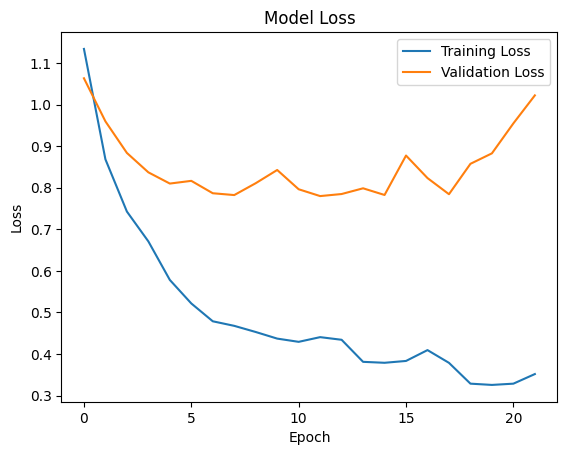

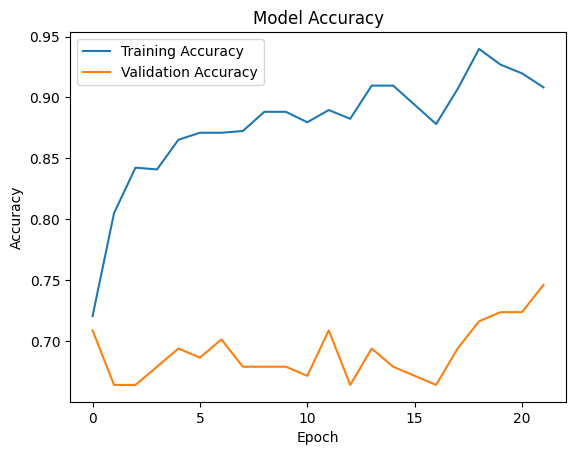

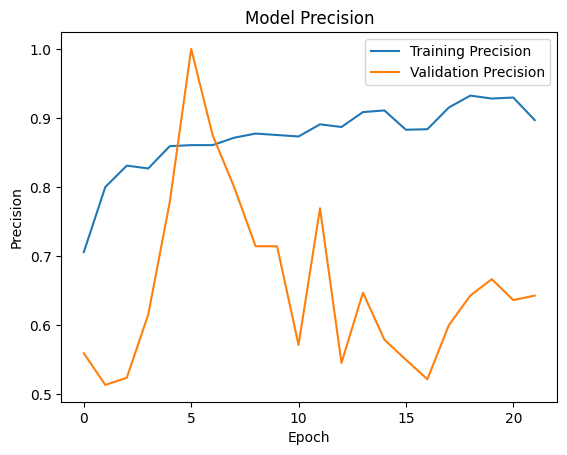

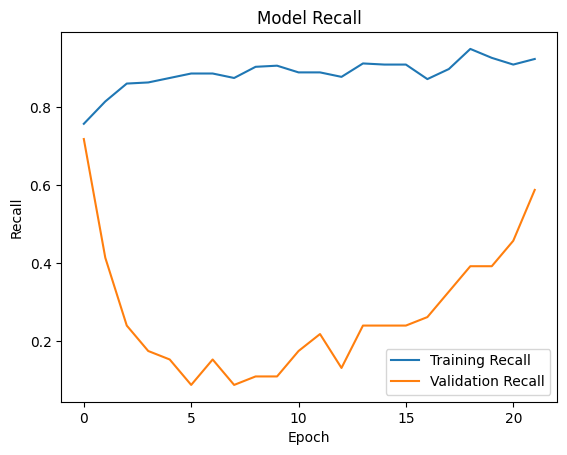

In [ ]:
import matplotlib.pyplot as plt

# 1) Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2) Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3) Plot Training & Validation Precision
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# 4) Plot Training & Validation Recall
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()


## ML Models

### Importing Machine Learning Models and Evaluation Metrics  

This cell imports various machine learning models and evaluation metrics for classification tasks. The models include **Decision Tree Classifier**, **XGBoost Classifier**, **LightGBM Classifier**, **Gaussian Naive Bayes**, and **Support Vector Classifier (SVC)**. These models will be used to compare their performance with deep learning models. Additionally, the evaluation metrics imported include **accuracy score, precision score, recall score, F1-score, and confusion matrix**, which help assess model performance based on different aspects such as correctness, false positives, and false negatives.  


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

### Helper Function for Model Evaluation and Storage  

This function evaluates a trained model on both the **original training set** (without oversampling) and the **validation set**, storing key performance metrics for comparison. It takes a model, its name, and the corresponding datasets as inputs.  

The function first predicts the labels for the training and validation datasets. Then, it calculates important **evaluation metrics**, including **accuracy, precision, recall, F1-score, and the confusion matrix**. Additionally, it measures the accuracy difference between the training and validation sets, helping to detect overfitting.  

The computed metrics are stored in the model_scores dictionary under the given model_name, and the trained model is saved in the models dictionary for future use. This function ensures a systematic approach to evaluating and comparing different machine learning models.  


In [ ]:

# Helper function to evaluate model and store metrics
def evaluate_and_store(model, model_name,
                       X_train_orig, y_train_orig,
                       X_val_orig,   y_val_orig):
    """
    model        : trained model
    model_name   : str, key to store in dict
    X_train_orig : original scaled training set (non-oversampled)
    y_train_orig : original training labels
    X_val_orig   : scaled validation set
    y_val_orig   : validation labels
    """
    # Predict on original train
    y_train_pred = model.predict(X_train_orig)
    # Predict on validation
    y_val_pred   = model.predict(X_val_orig)

    # Calculate metrics
    train_acc = accuracy_score(y_train_orig, y_train_pred)
    val_acc   = accuracy_score(y_val_orig,   y_val_pred)
    acc_diff  = train_acc - val_acc

    prec      = precision_score(y_val_orig, y_val_pred)
    rec       = recall_score(y_val_orig,    y_val_pred)
    f1        = f1_score(y_val_orig,        y_val_pred)
    conf_m    = confusion_matrix(y_val_orig, y_val_pred)

    # Store scores
    model_scores[model_name] = {
        'training_accuracy':   train_acc,
        'validation_accuracy': val_acc,
        'train_val_acc_diff': acc_diff,
        'precision':           prec,
        'recall':              rec,
        'f1_score':            f1,
        'confusion_matrix':    conf_m
    }
    # Store model
    models[model_name] = model


### Training and Evaluating Multiple Machine Learning Models  

This section trains and evaluates five different machine learning models on the **oversampled training dataset** and tests their performance on the **original validation dataset**. The models included are:  

1. **Decision Tree Classifier:** A simple tree-based model that learns decision rules from data.  
2. **XGBoost Classifier:** A powerful gradient boosting algorithm known for high performance.  
3. **LightGBM Classifier:** A fast and efficient boosting model optimized for large datasets.  
4. **Naive Bayes Classifier:** A probabilistic model best suited for categorical data and simple assumptions.  
5. **Support Vector Machine (SVM):** A model that finds an optimal hyperplane for classification.  

Each model is trained using the **SMOTE-oversampled dataset** to handle class imbalance. After training, the evaluate_and_store() function computes **accuracy, precision, recall, F1-score, and confusion matrix**, storing results for later comparison.  


In [ ]:

# =========== 1) Decision Tree ===========
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_oversampled, y_train_oversampled)

evaluate_and_store(dt, "decision_tree",
                   X_train_scaled, y_train,
                   X_val_scaled,   y_val)

# =========== 2) XGBoost ===========
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_clf.fit(X_train_oversampled, y_train_oversampled)

evaluate_and_store(xgb_clf, "xgboost",
                   X_train_scaled, y_train,
                   X_val_scaled,   y_val)

# =========== 3) LightGBM ===========
lgb_clf = LGBMClassifier(random_state=42)
lgb_clf.fit(X_train_oversampled, y_train_oversampled)

evaluate_and_store(lgb_clf, "lightgbm",
                   X_train_scaled, y_train,
                   X_val_scaled,   y_val)

# =========== 4) Naive Bayes ===========
nb_clf = GaussianNB()
nb_clf.fit(X_train_oversampled, y_train_oversampled)

evaluate_and_store(nb_clf, "naive_bayes",
                   X_train_scaled, y_train,
                   X_val_scaled,   y_val)

# =========== 5) SVM ===========
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_oversampled, y_train_oversampled)

evaluate_and_store(svm_clf, "svm",
                   X_train_scaled, y_train,
                   X_val_scaled,   y_val)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:06:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 349, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 698, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valid

## Model scores

### Converting Model Scores into a DataFrame  

This cell converts the model_scores dictionary into a **pandas DataFrame**, making it easier to analyze and compare the performance of different models. Each row represents a model, while columns store key evaluation metrics such as **accuracy, precision, recall, F1-score, and confusion matrix**.  

Displaying df_scores provides a structured overview of model performances, aiding in model selection and hyperparameter tuning.  


In [ ]:
df_scores = pd.DataFrame.from_dict(model_scores, orient='index')
df_scores

,training_accuracy,validation_accuracy,train_val_acc_diff,precision,recall,f1_score,confusion_matrix
DNN,0.724719,0.708955,0.015764,0.769231,0.217391,0.338983,"[[85, 3], [36, 10]]"
decision_tree,1.000000,0.753731,0.246269,0.606557,0.804348,0.691589,"[[64, 24], [9, 37]]"
xgboost,1.000000,0.738806,0.261194,0.607843,0.673913,0.639175,"[[68, 20], [15, 31]]"
lightgbm,1.000000,0.768657,0.231343,0.641509,0.739130,0.686869,"[[69, 19], [12, 34]]"
naive_bayes,0.769663,0.686567,0.083096,0.535714,0.652174,0.588235,"[[62, 26], [16, 30]]"
svm,0.829588,0.708955,0.120633,0.563636,0.673913,0.613861,"[[64, 24], [15, 31]]"


### Saving Model Scores and Trained Models  

This cell saves model performance metrics and trained models for future use. The df_scores DataFrame is converted into a CSV file and stored in Google Drive. The deep learning model (DNN) is saved as an .h5 file, while machine learning models (Decision Tree, XGBoost, LightGBM, Naive Bayes, SVM) are serialized as .pkl files using joblib. This allows easy reloading for further analysis or deployment.  


In [ ]:
import os
import pandas as pd
import joblib

# 2) Save the DataFrame as a CSV
save_dir = '/content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models'
os.makedirs(save_dir, exist_ok=True)  # create directory if not exists

csv_path = os.path.join(save_dir, 'model_scores.csv')
df_scores.to_csv(csv_path, index=True)
print(f"Saved model scores to: {csv_path}")

# 3) Save each model in the models dict
for model_name, model_obj in models.items():
    if model_name == 'DNN':
        # best_model is your DNN (keras/tf model)
        h5_path = os.path.join(save_dir, 'DNN_model.h5')
        model_obj.save(h5_path)
        print(f"Saved DNN model to: {h5_path}")
    else:
        # Other models (Decision Tree, XGBoost, LightGBM, Naive Bayes, SVM)
        # can be serialized with joblib (or pickle)
        pkl_path = os.path.join(save_dir, f'{model_name}.pkl')
        joblib.dump(model_obj, pkl_path)
        print(f"Saved {model_name} model to: {pkl_path}")


Saved model scores to: /content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models/model_scores.csv
Saved DNN model to: /content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models/DNN_model.h5
Saved decision_tree model to: /content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models/decision_tree.pkl
Saved xgboost model to: /content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models/xgboost.pkl
Saved lightgbm model to: /content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models/lightgbm.pkl
Saved naive_bayes model to: /content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models/naive_bayes.pkl
Saved svm model to: /content/drive/MyDrive/BCU - MSc in AI/Deep Learning/models/svm.pkl


## Predict test data

### Scaling Test Data  

Applies the **same scaler** used during training to transform the test dataset, ensuring that the input features remain consistent with the trained models.  


In [ ]:
# Transform with the SAME scaler used on training data
X_test_scaled = scaler.transform(test_df)

### Predicting with LightGBM Model  

Retrieves the trained **LightGBM model** from the dictionary and generates predictions on the **scaled test dataset**. The predictions represent the model's classification outputs.  


In [ ]:
ml_model = models["lightgbm"]  # retrieve the model from the dict
y_test_pred_ml = ml_model.predict(X_test_scaled)  # predicted labels


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Predicting with Deep Learning Model (DNN)  

Loads the trained **DNN model** and makes predictions on the **scaled test dataset**. Since the model outputs probabilities (due to the sigmoid activation), they are converted into binary class labels using a **0.5 threshold**.  


In [ ]:
dnn_model = models["DNN"]
y_test_probs_dnn = dnn_model.predict(X_test_scaled)  # predicted probabilities

# it's a binary classification with sigmoid output:
y_test_pred_dnn = (y_test_probs_dnn > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


### Saving Predictions to CSV  

Stores the **predicted class labels** in the test dataset and saves the updated DataFrame as a **CSV file** in Google Drive. This allows for further analysis and evaluation of the model's performance.  

In [ ]:
test_df["Predicted_Class"] = y_test_pred_dnn
test_df.to_csv("/content/drive/MyDrive/BCU - MSc in AI/Deep Learning/test_predictions.csv", index=False)